In [7]:

# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sn


In [2]:
# reading csv file  
normal=pd.read_csv("ptbdb_normal.csv",header=None) 
#normal.head(2) #for 2 rows
#normal.head() #for some top rows
#normal

abnormal=pd.read_csv("ptbdb_abnormal.csv",header=None) 
#abnormal

test=pd.read_csv("mitbih_test.csv",header=None) 
#test.head(2)
#test

train=pd.read_csv("mitbih_train.csv",header=None) 
#train

In [3]:
y_train=train.iloc[:,187] 
print("y_train shape : ",y_train.shape)


x_train=train.iloc[:,0:187] 
print("x_train shape : ",x_train.shape)

y_train shape :  (87554,)
x_train shape :  (87554, 187)


In [4]:
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(x_train)
print(standardized_data.shape)

(87554, 187)


In [5]:
sample_data=standardized_data
labels=y_train

shape of pca_reduced.shape =  (87554, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


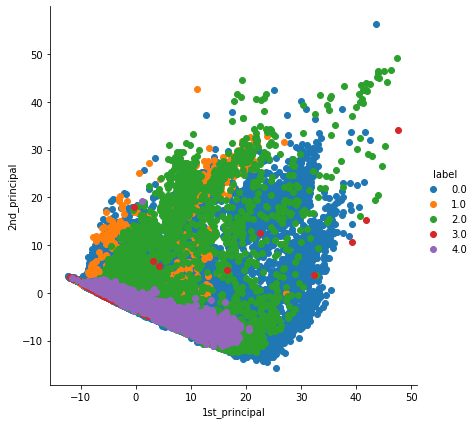

In [58]:
# pca for visualization

# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


labels=y_train

# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))

import seaborn as sn

sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()



In [59]:
#PCA for dimensionality redcution (not for visualization)

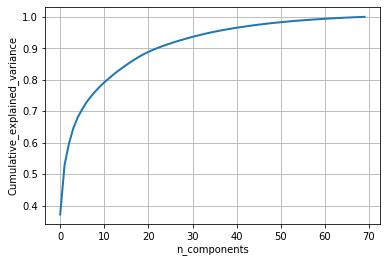

In [60]:
from sklearn import decomposition
pca=decomposition.PCA()

pca.n_components = 70
pca_data = pca.fit_transform(sample_data)


percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_ )

cummulative_var_exp = np.cumsum(percentage_var_explained)





# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cummulative_var_exp, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


In [61]:
print(pca_data.shape)

print(y_train.shape)

seed = 2
np.random.seed(seed)

[x_train1,x_test1,y_train1,y_test1]=train_test_split(pca_data,y_train,test_size=0.2,random_state=2)

print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(87554, 70)
(87554,)
(70043, 70)
(17511, 70)
(70043,)
(17511,)


In [62]:
# SVM model
a_svm=svm.SVC(gamma='scale')
a_svm.fit(x_train1,y_train1)
y_pred_svm=a_svm.predict(x_test1)


#from sklearn.metrics import classification_report, confusion_matrix
cm_svm=confusion_matrix(y_test1,y_pred_svm)
print(cm_svm)
print("********************************")

report_svm=classification_report(y_test1,y_pred_svm)
print(report_svm)

#Precision=TP/(TP+FP)
#Recall=TP/(TP+FN)
#F1 Score=(2*Recall*Precision)/(Recall+Precision)
#Accuracy=(TP+TN)/(TP+TN+FN+FP)
#Accuracy_Score_svm=accuracy_score(y_test,y_pred_svm)
#print('Average Accuracy:%0.2f +/- (%0.1f) %%' % (Accuracy_Score_svm.mean()*100, Accuracy_Score_svm.std()*100))


print("********************************")


Accuracy_svm=accuracy_score(y_test1, y_pred_svm)
print("Accuracy of svm is : {0}".format(Accuracy_svm))

F1_score_svm= f1_score(y_test1, y_pred_svm,average='weighted')
print('F1_score of svm is : {0}'.format(F1_score_svm))

Recall_svm= recall_score(y_test1, y_pred_svm,average='weighted')
print('Recall of svm is : {0}'.format(Recall_svm))
      
Precision_svm= precision_score(y_test1, y_pred_svm,average='weighted')      
print('Precision of svm is : {0}'.format(Precision_svm))



[[14511    10    18     2     6]
 [  152   287     4     0     0]
 [  154     0  1010     8     2]
 [   40     0    12    53     0]
 [   87     0     6     0  1149]]
********************************
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     14547
         1.0       0.97      0.65      0.78       443
         2.0       0.96      0.86      0.91      1174
         3.0       0.84      0.50      0.63       105
         4.0       0.99      0.93      0.96      1242

    accuracy                           0.97     17511
   macro avg       0.95      0.79      0.85     17511
weighted avg       0.97      0.97      0.97     17511

********************************
Accuracy of svm is : 0.9713894123693678
F1_score of svm is : 0.9697649913428892
Recall of svm is : 0.9713894123693678
Precision of svm is : 0.9710815477845814


In [63]:
# Logistic Regression
a_lr=LogisticRegression()
a_lr.fit(x_train1,y_train1)
y_pred_lr=a_lr.predict(x_test1)

cm_lr=confusion_matrix(y_test1,y_pred_lr)
print(cm_lr)
print("********************************")

report_lr=classification_report(y_test1,y_pred_lr)
print(report_lr)

print("********************************")

Precision_lr= precision_score(y_test1, y_pred_lr,average='weighted')      
print('Precision of lr is : {0}'.format(Precision_lr))

Recall_lr= recall_score(y_test1, y_pred_lr,average='weighted')
print('Recall of lr is : {0}'.format(Recall_lr))

F1_score_lr= f1_score(y_test1, y_pred_lr,average='weighted')
print('F1_score of lr is : {0}'.format(F1_score_lr))

Accuracy_lr=accuracy_score(y_test1, y_pred_lr)
print("Accuracy of lr is : {0}".format(Accuracy_lr))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[14359     4   150     1    33]
 [  372    39    29     0     3]
 [  809    14   331     1    19]
 [   86     0     5    14     0]
 [  158     1     3     0  1080]]
********************************
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     14547
         1.0       0.67      0.09      0.16       443
         2.0       0.64      0.28      0.39      1174
         3.0       0.88      0.13      0.23       105
         4.0       0.95      0.87      0.91      1242

    accuracy                           0.90     17511
   macro avg       0.81      0.47      0.53     17511
weighted avg       0.89      0.90      0.88     17511

********************************
Precision of lr is : 0.8883232665483262
Recall of lr is : 0.9036034492604649
F1_score of lr is : 0.8825656004566265
Accuracy of lr is : 0.9036034492604649


In [64]:
#Naive Bayes
a_nb=GaussianNB()
a_nb.fit(x_train1,y_train1)
y_pred_nb=a_nb.predict(x_test1)

cm_nb=confusion_matrix(y_test1,y_pred_nb)
print(cm_nb)
print("********************************")

report_nb=classification_report(y_test1,y_pred_nb)
print(report_nb)

print("********************************")

Precision_nb= precision_score(y_test1, y_pred_nb,average='weighted')      
print('Precision of nb is : {0}'.format(Precision_nb))

Recall_nb= recall_score(y_test1, y_pred_nb,average='weighted')
print('Recall of nb is : {0}'.format(Recall_nb))

F1_score_nb= f1_score(y_test1, y_pred_nb,average='weighted')
print('F1_score of nb is : {0}'.format(F1_score_nb))

Accuracy_nb=accuracy_score(y_test1, y_pred_nb)
print("Accuracy of nb is : {0}".format(Accuracy_nb))


[[9607  384 1312 1762 1482]
 [ 291   90   49    6    7]
 [ 317   10  354  117  376]
 [   6    0    2   96    1]
 [  89    0    5    7 1141]]
********************************
              precision    recall  f1-score   support

         0.0       0.93      0.66      0.77     14547
         1.0       0.19      0.20      0.19       443
         2.0       0.21      0.30      0.24      1174
         3.0       0.05      0.91      0.09       105
         4.0       0.38      0.92      0.54      1242

    accuracy                           0.64     17511
   macro avg       0.35      0.60      0.37     17511
weighted avg       0.82      0.64      0.70     17511

********************************
Precision of nb is : 0.8197796082181703
Recall of nb is : 0.6446233795899721
F1_score of nb is : 0.7020880839497612
Accuracy of nb is : 0.6446233795899721


In [65]:
#Stochastic Gradient Descent
a_sgd=SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
a_sgd.fit(x_train1,y_train1)
y_pred_sgd=a_sgd.predict(x_test1)

cm_sgd=confusion_matrix(y_test1,y_pred_sgd)
print(cm_sgd)
print("********************************")

report_sgd=classification_report(y_test1,y_pred_sgd)
print(report_sgd)

print("********************************")

Precision_sgd= precision_score(y_test1, y_pred_sgd,average='weighted')      
print('Precision of sgd is : {0}'.format(Precision_sgd))

Recall_sgd= recall_score(y_test1, y_pred_sgd,average='weighted')
print('Recall of sgd is : {0}'.format(Recall_sgd))

F1_score_sgd= f1_score(y_test1, y_pred_sgd,average='weighted')
print('F1_score of sgd is : {0}'.format(F1_score_sgd))

Accuracy_sgd=accuracy_score(y_test1, y_pred_sgd)
print("Accuracy of sgd is : {0}".format(Accuracy_sgd))

[[14394     5    71    27    50]
 [  406    25    10     0     2]
 [  879     8   246    10    31]
 [   61     0     4    40     0]
 [  167     1     5     0  1069]]
********************************
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95     14547
         1.0       0.64      0.06      0.10       443
         2.0       0.73      0.21      0.33      1174
         3.0       0.52      0.38      0.44       105
         4.0       0.93      0.86      0.89      1242

    accuracy                           0.90     17511
   macro avg       0.75      0.50      0.54     17511
weighted avg       0.89      0.90      0.88     17511

********************************
Precision of sgd is : 0.8859532887733803
Recall of sgd is : 0.9008052081548741
F1_score of sgd is : 0.8757362651058972
Accuracy of sgd is : 0.9008052081548741


In [66]:
#K-Nearest Neighbours
a_knn=KNeighborsClassifier(n_neighbors=15)
a_knn.fit(x_train1,y_train1)
y_pred_knn=a_knn.predict(x_test1)

cm_knn=confusion_matrix(y_test1,y_pred_knn)
print(cm_knn)
print("********************************")

report_knn=classification_report(y_test1,y_pred_knn)
print(report_knn)

print("********************************")

Precision_knn= precision_score(y_test1, y_pred_knn,average='weighted')      
print('Precision of knn is : {0}'.format(Precision_knn))

Recall_knn= recall_score(y_test1, y_pred_knn,average='weighted')
print('Recall of knn is : {0}'.format(Recall_knn))

F1_score_knn= f1_score(y_test1, y_pred_knn,average='weighted')
print('F1_score of knn is : {0}'.format(F1_score_knn))

Accuracy_knn=accuracy_score(y_test1, y_pred_knn)
print("Accuracy of knn is : {0}".format(Accuracy_knn))


[[14451    17    55     8    16]
 [  137   295     9     0     2]
 [  180     7   975     8     4]
 [   31     0     9    65     0]
 [   58     1     5     0  1178]]
********************************
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     14547
         1.0       0.92      0.67      0.77       443
         2.0       0.93      0.83      0.88      1174
         3.0       0.80      0.62      0.70       105
         4.0       0.98      0.95      0.96      1242

    accuracy                           0.97     17511
   macro avg       0.92      0.81      0.86     17511
weighted avg       0.97      0.97      0.97     17511

********************************
Precision of knn is : 0.9678709581923464
Recall of knn is : 0.9687624921477929
F1_score of knn is : 0.9674390002218572
Accuracy of knn is : 0.9687624921477929


In [67]:
# Decision Binary Tree
a_dt=DecisionTreeClassifier(max_depth=10,random_state=101,max_features= None, min_samples_leaf=15)
a_dt.fit(x_train1,y_train1)
y_pred_dt=a_dt.predict(x_test1)

cm_dt=confusion_matrix(y_test1,y_pred_dt)
print(cm_dt)
print("********************************")

report_dt=classification_report(y_test1,y_pred_dt)
print(report_dt)

print("********************************")

Precision_dt= precision_score(y_test1, y_pred_dt,average='weighted')      
print('Precision of dt is : {0}'.format(Precision_dt))

Recall_dt= recall_score(y_test1, y_pred_nb,average='weighted')
print('Recall of dt is : {0}'.format(Recall_dt))

F1_score_dt= f1_score(y_test1, y_pred_dt,average='weighted')
print('F1_score of dt is : {0}'.format(F1_score_dt))

Accuracy_dt=accuracy_score(y_test1, y_pred_dt)
print("Accuracy of dt is : {0}".format(Accuracy_dt))

[[14437    11    75     0    24]
 [  253   183     2     0     5]
 [  385     5   761     2    21]
 [   90     0     6     9     0]
 [  154     0    29     0  1059]]
********************************
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     14547
         1.0       0.92      0.41      0.57       443
         2.0       0.87      0.65      0.74      1174
         3.0       0.82      0.09      0.16       105
         4.0       0.95      0.85      0.90      1242

    accuracy                           0.94     17511
   macro avg       0.90      0.60      0.67     17511
weighted avg       0.94      0.94      0.93     17511

********************************
Precision of dt is : 0.9372466834387599
Recall of dt is : 0.6446233795899721
F1_score of dt is : 0.93224120475844
Accuracy of dt is : 0.9393524070584204


In [68]:
# Random Forest Classifier
a_rf=RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=30)
a_rf.fit(x_train1,y_train1)
y_pred_rf=a_rf.predict(x_test1)


cm_rf=confusion_matrix(y_test1,y_pred_rf)
print(cm_rf)
print("********************************")

report_rf=classification_report(y_test1,y_pred_rf)
print(report_rf)

print("********************************")

Precision_rf= precision_score(y_test1, y_pred_rf,average='weighted')      
print('Precision of rf model is : {0}'.format(Precision_rf))

Recall_rf= recall_score(y_test1, y_pred_rf,average='weighted')
print('Recall of rf model is : {0}'.format(Recall_rf))

F1_score_rf= f1_score(y_test1, y_pred_rf,average='weighted')
print('F1_score of rf model is : {0}'.format(F1_score_rf))

Accuracy_rf=accuracy_score(y_test1, y_pred_rf)
print("Accuracy of rf model is : {0}".format(Accuracy_rf))

[[14445    11    71     3    17]
 [  206   230     3     0     4]
 [  285     7   871     2     9]
 [   35     0    11    59     0]
 [  143     0    13     0  1086]]
********************************
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     14547
         1.0       0.93      0.52      0.67       443
         2.0       0.90      0.74      0.81      1174
         3.0       0.92      0.56      0.70       105
         4.0       0.97      0.87      0.92      1242

    accuracy                           0.95     17511
   macro avg       0.94      0.74      0.81     17511
weighted avg       0.95      0.95      0.95     17511

********************************
Precision of rf model is : 0.9522369537770726
Recall of rf model is : 0.9531722917023585
F1_score of rf model is : 0.9499993953201948
Accuracy of rf model is : 0.9531722917023585


In [69]:

models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes','Stochastic Gradient Descent'],
    'Accuracy'    : [Accuracy_lr,   Accuracy_dt,   Accuracy_svm,    Accuracy_rf,   Accuracy_knn,   Accuracy_nb,   Accuracy_sgd],
    'Precision'   : [Precision_lr,  Precision_dt,  Precision_svm,   Precision_rf,  Precision_knn,  Precision_nb,  Precision_sgd],
    'Recall'      : [Recall_lr,     Recall_dt,     Recall_svm,      Recall_rf,     Recall_knn,     Recall_nb,     Recall_sgd],
    'F1_score'    : [F1_score_lr,   F1_score_dt,   F1_score_svm,    F1_score_rf,   F1_score_knn,   F1_score_nb,   F1_score_sgd],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

models_initial.sort_values(by='Accuracy', ascending=False)



,Model,Accuracy,Precision,Recall,F1_score
2,Support Vector Machine,0.971389,0.971082,0.971389,0.969765
4,K-Nearest Neighbors,0.968762,0.967871,0.968762,0.967439
3,Random Forest,0.953172,0.952237,0.953172,0.949999
1,Decision Tree,0.939352,0.937247,0.644623,0.932241
0,Logistic Regression,0.903603,0.888323,0.903603,0.882566
6,Stochastic Gradient Descent,0.900805,0.885953,0.900805,0.875736
5,Naive Bayes,0.644623,0.819780,0.644623,0.702088
